In [65]:
from cellpose import utils, models
import cv2
import numpy as np
import time, os, sys
from glob import glob
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
from tifffile import imread


In [66]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
mpl.rcParams['figure.dpi'] = 96

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
def random_label_cmap(n=2**16):
    import matplotlib
    import colorsys
    # cols = np.random.rand(n,3)
    # cols = np.random.uniform(0.1,1.0,(n,3))
    h,l,s = np.random.uniform(0,1,n), 0.4 + np.random.uniform(0,0.6,n), 0.2 + np.random.uniform(0,0.8,n)
    cols = np.stack([colorsys.hls_to_rgb(_h,_l,_s) for _h,_l,_s in zip(h,l,s)],axis=0)
    cols[0] = 0
    return matplotlib.colors.ListedColormap(cols)

lbl_cmap = random_label_cmap()

In [68]:
# HOME = '/home/qzt'
HOME = '/home/lis-paul'
# HOME = '/Users/qzt'
# PATH = "data/dsb2018/dsb2018_sub1/"
PATH = "data/centuri/train/"
# PATH = 'cellpose/'
# path = os.path.join(HOME, "data/dsb2018/dsb2018_sub1/images/*.tif")
pathX = os.path.join(HOME, PATH+"images/*.tif")
pathY = os.path.join(HOME, PATH+"masks/*.tif")
X_file = sorted(glob(pathX))
Y_file = sorted(glob(pathY))

X = list(map(skimage.io.imread,X_file))
Y = list(map(imread,Y_file))
print(len(X), len(Y))

5 5


In [69]:
Y[0].min(), Y[0].max()

(0, 106)

In [74]:
imgs = X[0:1]

In [22]:
# RUN CELLPOSE


# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
# model = models.Cellpose(gpu=False, model_type='cyto')
model = models.Cellpose(gpu=False, model_type='nuclei')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
# channels = [[2,3], [0,0], [0,0]]
channels=[0,0]

print(len(imgs),imgs[0].shape)
# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images
masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=[0,0], tile=True, net_avg=False)
print(diams)

  0%|          | 0/5 [00:00<?, ?it/s]

>>>> using CPU
5 (1022, 1022)
processing 5 images


  0%|          | 0/5 [00:00<?, ?it/s]

estimated cell diameters for all images


100%|██████████| 5/5 [00:43<00:00,  8.62s/it]

[62.95183487 67.42948321 21.20031979 13.15904928 18.88139488]


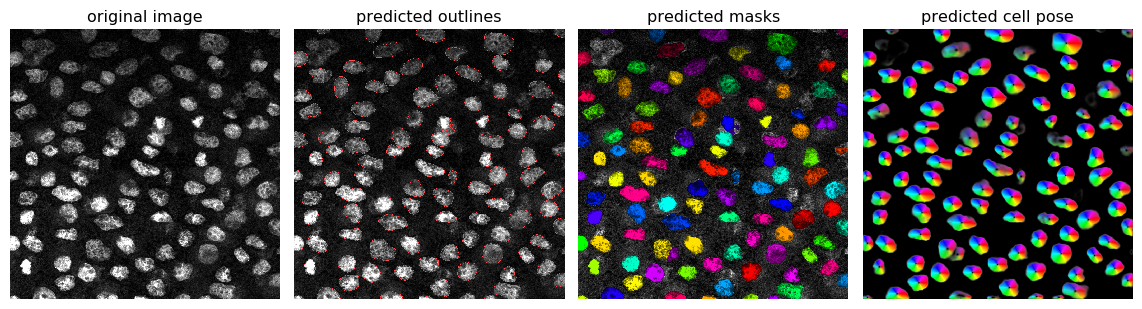

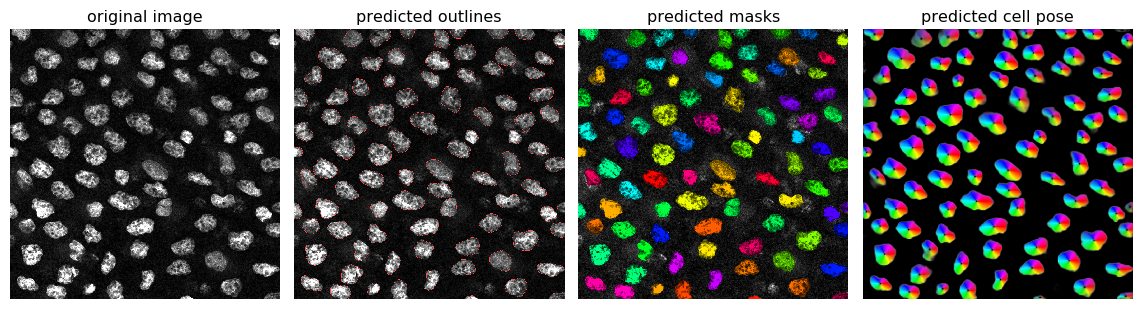

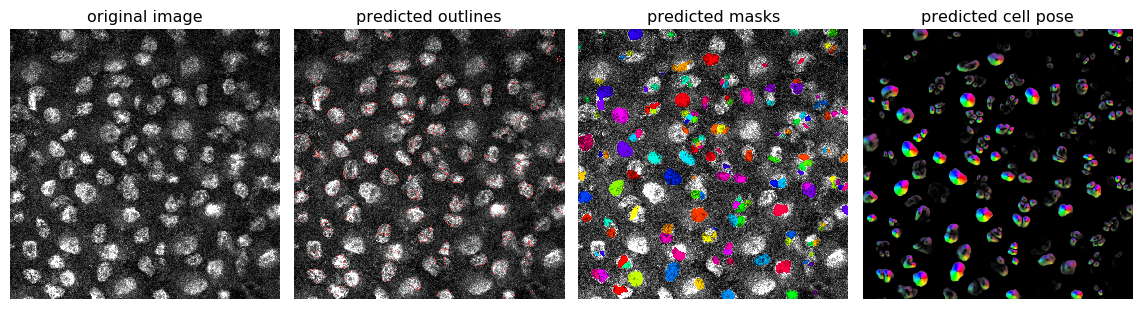

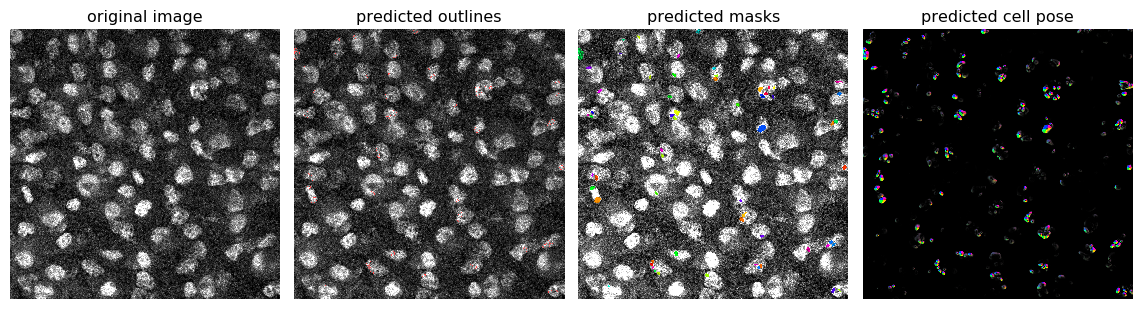

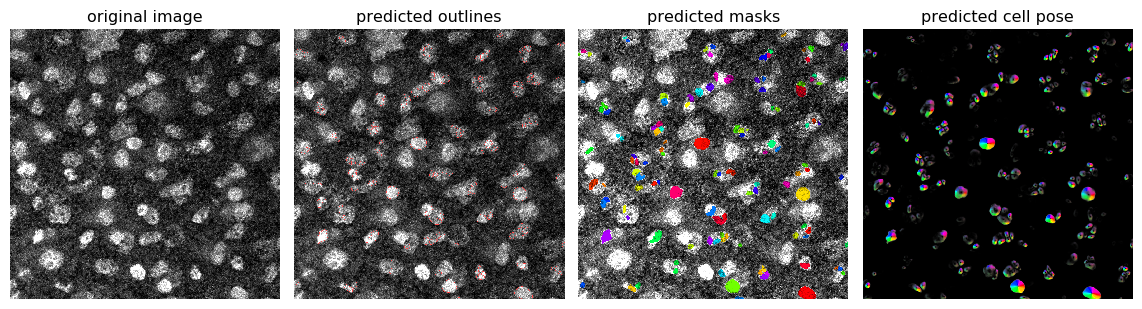

In [24]:
# DISPLAY RESULTS
from cellpose import plot

nimg = len(imgs)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=[0,0])
    plt.tight_layout()
    plt.show()

In [75]:
filenames = X_file[0:1]
filenames

['/home/lis-paul/data/centuri/train/images/V1a-DMSO-x40-E1-2.tif']

In [76]:
model = models.Cellpose(gpu=True, model_type='nuclei')
channels=[0,0]

masks, flows, styles, diams = model.eval(imgs, diameter=65, channels=[0,0], tile=True, net_avg=True, flow_threshold=0.0)
print(diams)

>>>> using GPU
processing 1 images
[65.]


## export result

In [78]:
from cellpose import io

In [83]:
%%debug
io.masks_flows_to_seg(imgs, masks, flows, diams, filenames, channels=None)

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
None
> <string>(2)<module>()



ipdb>  s


--Call--
> /home/lis-paul/cellpose/cellpose/io.py(23)masks_flows_to_seg()
     21 
     22 
---> 23 def masks_flows_to_seg(images, masks, flows, diams, file_names, channels=None):
     24     """ save output of model eval to be loaded in GUI 
     25 



ipdb>  s


> /home/lis-paul/cellpose/cellpose/io.py(50)masks_flows_to_seg()
     48 
     49     """
---> 50     print(len(flows))
     51     print(len(flows[0]))
     52     nimg = len(masks)



ipdb>  n


1
> /home/lis-paul/cellpose/cellpose/io.py(51)masks_flows_to_seg()
     49     """
     50     print(len(flows))
---> 51     print(len(flows[0]))
     52     nimg = len(masks)
     53     if channels is None:



ipdb>  


4
> /home/lis-paul/cellpose/cellpose/io.py(52)masks_flows_to_seg()
     50     print(len(flows))
     51     print(len(flows[0]))
---> 52     nimg = len(masks)
     53     if channels is None:
     54         channels = [0,0]



ipdb>  


> /home/lis-paul/cellpose/cellpose/io.py(53)masks_flows_to_seg()
     51     print(len(flows[0]))
     52     nimg = len(masks)
---> 53     if channels is None:
     54         channels = [0,0]
     55     for n in range(nimg):



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(54)masks_flows_to_seg()
     52     nimg = len(masks)
     53     if channels is None:
---> 54         channels = [0,0]
     55     for n in range(nimg):
     56         flowi = []



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(55)masks_flows_to_seg()
     53     if channels is None:
     54         channels = [0,0]
---> 55     for n in range(nimg):
     56         flowi = []
     57         if flows[n][0].ndim==3:



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(56)masks_flows_to_seg()
     54         channels = [0,0]
     55     for n in range(nimg):
---> 56         flowi = []
     57         if flows[n][0].ndim==3:
     58             flowi.append(flows[n][0][np.newaxis,...])



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(57)masks_flows_to_seg()
     55     for n in range(nimg):
     56         flowi = []
---> 57         if flows[n][0].ndim==3:
     58             flowi.append(flows[n][0][np.newaxis,...])
     59         else:



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(58)masks_flows_to_seg()
     56         flowi = []
     57         if flows[n][0].ndim==3:
---> 58             flowi.append(flows[n][0][np.newaxis,...])
     59         else:
     60             flowi.append(flows[n][0])



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(61)masks_flows_to_seg()
     59         else:
     60             flowi.append(flows[n][0])
---> 61         print(flowi[0].shape)
     62         flowi.append((np.clip(transforms.normalize99(flows[n][2]),0,1) * 255).astype(np.uint8)[np.newaxis,...])
     63         print(flows[n][0].shape)



ipdb>  n


(1, 1022, 1022, 3)
> /home/lis-paul/cellpose/cellpose/io.py(62)masks_flows_to_seg()
     60             flowi.append(flows[n][0])
     61         print(flowi[0].shape)
---> 62         flowi.append((np.clip(transforms.normalize99(flows[n][2]),0,1) * 255).astype(np.uint8)[np.newaxis,...])
     63         print(flows[n][0].shape)
     64         if flows[n][0].ndim==3:



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(63)masks_flows_to_seg()
     61         print(flowi[0].shape)
     62         flowi.append((np.clip(transforms.normalize99(flows[n][2]),0,1) * 255).astype(np.uint8)[np.newaxis,...])
---> 63         print(flows[n][0].shape)
     64         if flows[n][0].ndim==3:
     65             flowi.append(np.zeros(flows[n][1][0].shape, dtype=np.uint8))



ipdb>  n


(1022, 1022, 3)
> /home/lis-paul/cellpose/cellpose/io.py(64)masks_flows_to_seg()
     62         flowi.append((np.clip(transforms.normalize99(flows[n][2]),0,1) * 255).astype(np.uint8)[np.newaxis,...])
     63         print(flows[n][0].shape)
---> 64         if flows[n][0].ndim==3:
     65             flowi.append(np.zeros(flows[n][1][0].shape, dtype=np.uint8))
     66             flowi[-1] = flowi[-1][np.newaxis,...]



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(65)masks_flows_to_seg()
     63         print(flows[n][0].shape)
     64         if flows[n][0].ndim==3:
---> 65             flowi.append(np.zeros(flows[n][1][0].shape, dtype=np.uint8))
     66             flowi[-1] = flowi[-1][np.newaxis,...]
     67         else:



ipdb>  len(flowi)


2


ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(66)masks_flows_to_seg()
     64         if flows[n][0].ndim==3:
     65             flowi.append(np.zeros(flows[n][1][0].shape, dtype=np.uint8))
---> 66             flowi[-1] = flowi[-1][np.newaxis,...]
     67         else:
     68             flowi.append((flows[n][1][0]/10 * 127 + 127).astype(np.uint8))



ipdb>  len(flowi)


3


ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(69)masks_flows_to_seg()
     67         else:
     68             flowi.append((flows[n][1][0]/10 * 127 + 127).astype(np.uint8))
---> 69         if len(flows[n])>2:
     70             flowi.append(flows[n][3])
     71             flowi.append(np.concatenate((flows[n][1], flows[n][2][np.newaxis,...]), axis=0))



ipdb>  flowi[2].shape


(1, 1022, 1022)


ipdb>  flowi[-1].shape


(1, 1022, 1022)


ipdb>  flowi[-1]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ipdb>  flowi[-1].sum()


0


ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(70)masks_flows_to_seg()
     68             flowi.append((flows[n][1][0]/10 * 127 + 127).astype(np.uint8))
     69         if len(flows[n])>2:
---> 70             flowi.append(flows[n][3])
     71             flowi.append(np.concatenate((flows[n][1], flows[n][2][np.newaxis,...]), axis=0))
     72         outlines = masks[n] * plot.masks_to_outlines(masks[n])



ipdb>  flows[n].shape


*** AttributeError: 'list' object has no attribute 'shape'


ipdb>  len(flows[n])


4


ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(71)masks_flows_to_seg()
     69         if len(flows[n])>2:
     70             flowi.append(flows[n][3])
---> 71             flowi.append(np.concatenate((flows[n][1], flows[n][2][np.newaxis,...]), axis=0))
     72         outlines = masks[n] * plot.masks_to_outlines(masks[n])
     73         base = os.path.splitext(file_names[n])[0]



ipdb>  len(flowi)


4


ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(72)masks_flows_to_seg()
     70             flowi.append(flows[n][3])
     71             flowi.append(np.concatenate((flows[n][1], flows[n][2][np.newaxis,...]), axis=0))
---> 72         outlines = masks[n] * plot.masks_to_outlines(masks[n])
     73         base = os.path.splitext(file_names[n])[0]
     74         if images[n].shape[0]<8:



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(73)masks_flows_to_seg()
     71             flowi.append(np.concatenate((flows[n][1], flows[n][2][np.newaxis,...]), axis=0))
     72         outlines = masks[n] * plot.masks_to_outlines(masks[n])
---> 73         base = os.path.splitext(file_names[n])[0]
     74         if images[n].shape[0]<8:
     75             np.transpose(images[n], (1,2,0))



ipdb>  len(flowi)


5


ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(74)masks_flows_to_seg()
     72         outlines = masks[n] * plot.masks_to_outlines(masks[n])
     73         base = os.path.splitext(file_names[n])[0]
---> 74         if images[n].shape[0]<8:
     75             np.transpose(images[n], (1,2,0))
     76         np.save(base+ '_seg.npy',



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(76)masks_flows_to_seg()
     74         if images[n].shape[0]<8:
     75             np.transpose(images[n], (1,2,0))
---> 76         np.save(base+ '_seg.npy',
     77                     {'outlines': outlines.astype(np.uint16),
     78                      'masks': masks[n].astype(np.uint16),



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(77)masks_flows_to_seg()
     75             np.transpose(images[n], (1,2,0))
     76         np.save(base+ '_seg.npy',
---> 77                     {'outlines': outlines.astype(np.uint16),
     78                      'masks': masks[n].astype(np.uint16),
     79                      'chan_choose': channels,



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(78)masks_flows_to_seg()
     76         np.save(base+ '_seg.npy',
     77                     {'outlines': outlines.astype(np.uint16),
---> 78                      'masks': masks[n].astype(np.uint16),
     79                      'chan_choose': channels,
     80                      'img': images[n],



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(79)masks_flows_to_seg()
     77                     {'outlines': outlines.astype(np.uint16),
     78                      'masks': masks[n].astype(np.uint16),
---> 79                      'chan_choose': channels,
     80                      'img': images[n],
     81                      'ismanual': np.zeros(masks[n].max(), np.bool),



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(80)masks_flows_to_seg()
     78                      'masks': masks[n].astype(np.uint16),
     79                      'chan_choose': channels,
---> 80                      'img': images[n],
     81                      'ismanual': np.zeros(masks[n].max(), np.bool),
     82                      'filename': file_names[n],



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(81)masks_flows_to_seg()
     79                      'chan_choose': channels,
     80                      'img': images[n],
---> 81                      'ismanual': np.zeros(masks[n].max(), np.bool),
     82                      'filename': file_names[n],
     83                      'flows': flowi,



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(82)masks_flows_to_seg()
     80                      'img': images[n],
     81                      'ismanual': np.zeros(masks[n].max(), np.bool),
---> 82                      'filename': file_names[n],
     83                      'flows': flowi,
     84                      'est_diam': diams[n]})



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(83)masks_flows_to_seg()
     81                      'ismanual': np.zeros(masks[n].max(), np.bool),
     82                      'filename': file_names[n],
---> 83                      'flows': flowi,
     84                      'est_diam': diams[n]})
     85 



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(84)masks_flows_to_seg()
     82                      'filename': file_names[n],
     83                      'flows': flowi,
---> 84                      'est_diam': diams[n]})
     85 
     86 def save_to_png(images, masks, flows, file_names):



ipdb>  n


> /home/lis-paul/cellpose/cellpose/io.py(55)masks_flows_to_seg()
     53     if channels is None:
     54         channels = [0,0]
---> 55     for n in range(nimg):
     56         flowi = []
     57         if flows[n][0].ndim==3:



ipdb>  n


--Return--
None
> /home/lis-paul/cellpose/cellpose/io.py(55)masks_flows_to_seg()
     53     if channels is None:
     54         channels = [0,0]
---> 55     for n in range(nimg):
     56         flowi = []
     57         if flows[n][0].ndim==3:



ipdb>  n


--Return--
None
> <string>(2)<module>()



ipdb>  n


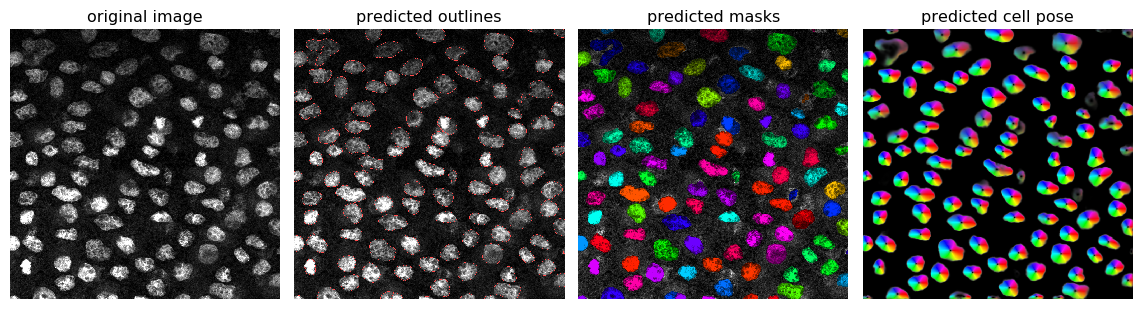

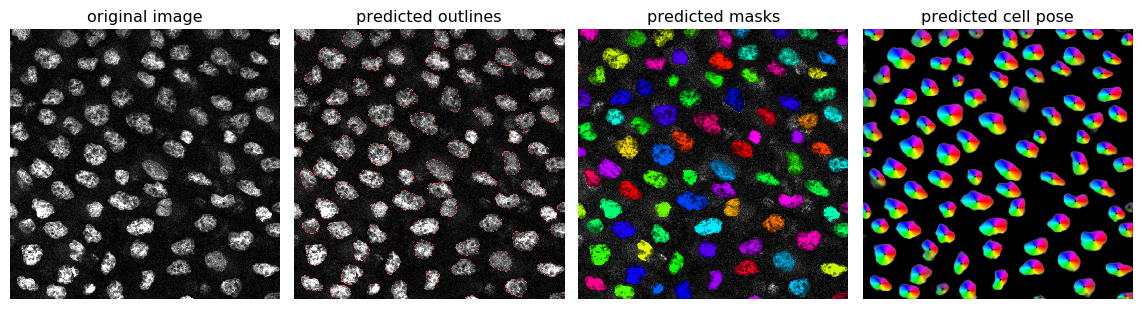

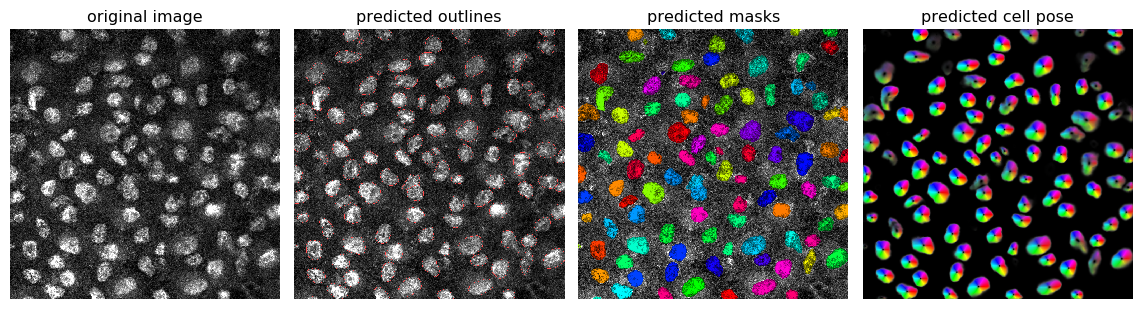

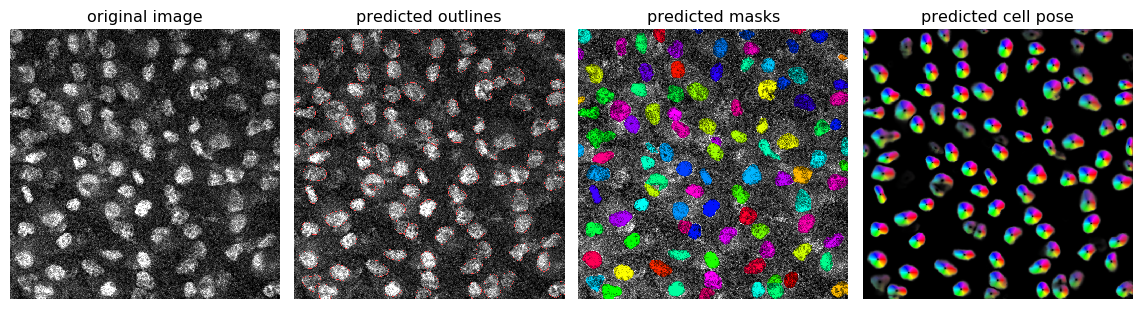

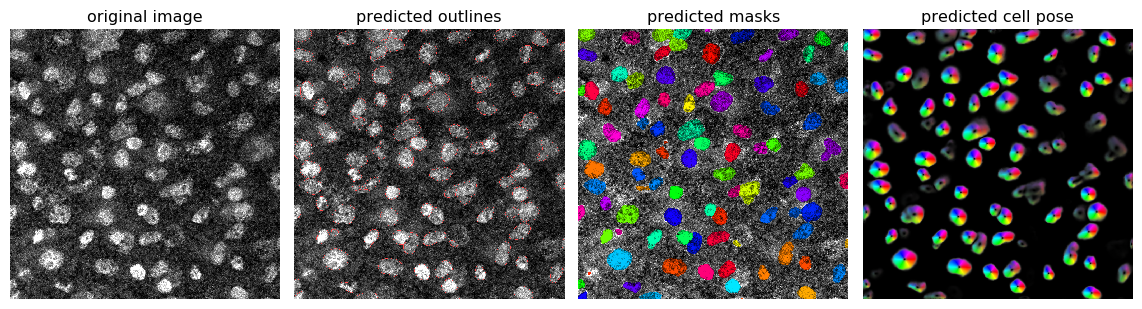

In [11]:
# DISPLAY RESULTS
from cellpose import plot

nimg = len(imgs)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=[0,0])
    plt.tight_layout()
    plt.show()

## Test the flow dynamics functions

flows.append([flow, dP, cellprob, p])

In [12]:
flow = flows[0]
dP = flow[1][:2,...]
dP.shape

(2, 1022, 1022)

In [13]:
image = dP[1,...]
print(image.min(), image.max())
np.savetxt('dp1.txt', image, delimiter=',')

-5.004075 5.0810924


In [20]:
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', 600,600)
cv2.imshow("image", image)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
cv2.imshow('My Image', X[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
flow0[2].shape

(1022, 1022)

In [ ]:
flow=flows[0]
dP = flow[]

## test the label to flow function

In [19]:
Y[0].min(), Y[0].max()

(0, 65280)

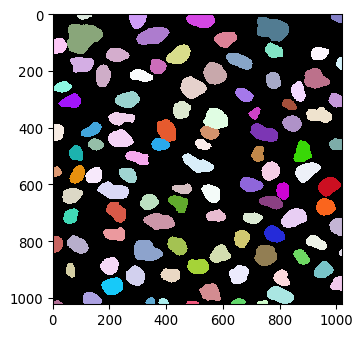

In [8]:
plt.imshow(Y[0], cmap=lbl_cmap)

In [11]:
Y[0].shape

(1022, 1022)

In [5]:
from cellpose import dynamics

In [6]:
# %%debug
flows = dynamics.labels_to_flows(Y)

  0%|          | 0/5 [00:00<?, ?it/s]

NOTE: computing flows for labels (could be done before to save time)


 60%|██████    | 3/5 [00:03<00:02,  1.27s/it]

KeyboardInterrupt: 

In [16]:
flows[0].shape

(3, 1022, 1022)

In [17]:
flow = flows[0]
np.savetxt('flow0.txt', flow[1,...])
np.savetxt('flow1.txt', flow[2,...])

In [22]:
Y[0].ndim

2

In [7]:
# %%debug
mu, mu_c = dynamics.masks_to_flows(Y[0])

In [48]:
mu.shape, mu_c.shape

((2, 1022, 1022), (1022, 1022))

In [8]:
np.savetxt('mu_c.txt', mu_c)

In [21]:
np.savetxt('mu0.txt', mu[0,...])
np.savetxt('mu1.txt', mu[1,...])

In [38]:
import scipy
slices = scipy.ndimage.find_objects(Y[0])
len(slices), slices[0]

(106, (slice(858, 920, None), slice(165, 232, None)))

In [33]:
diam = utils.diameters(Y[0])
diam[0], diam[1].shape

(53.73080972221539, (106,))

In [37]:
np.median(diam[1])

53.73080972221539

In [57]:
import scipy

masks = Y[0]
slices = scipy.ndimage.find_objects(masks)[:1]
print(slices)
dia = utils.diameters(masks)[0]
s2 = (0.15 * dia)**2
for i,si in enumerate(slices):
    if si is not None:
        sr,sc = si
        ly, lx = sr.stop - sr.start + 1, sc.stop - sc.start + 1
        y,x = np.nonzero(masks[sr, sc] == (i+1))
        y = y.astype(np.int32) + 1
        x = x.astype(np.int32) + 1
        ymed = np.median(y)
        xmed = np.median(x)
        imin = np.argmin((x-xmed)**2 + (y-ymed)**2)
        xmed = x[imin]
        ymed = y[imin]

        d2 = (x-xmed)**2 + (y-ymed)**2
        mu_c[sr.start+y-1, sc.start+x-1] = np.exp(-d2/s2)

        niter = 2*np.int32(np.ptp(x) + np.ptp(y))
        T = np.zeros((ly+2)*(lx+2), np.float64)
#         T = _extend_centers(T, y, x, ymed, xmed, np.int32(lx), niter)

[(slice(858, 920, None), slice(165, 232, None))]


In [61]:
for n in range(niter):
    T = np.zeros((ly+2)*(lx+2), np.float64)
    t0 = dynamics._extend_centers(T, y, x, ymed, xmed, np.int32(lx), n)
#     T2 = np.reshape(t0, (-1,np.int32(lx+2)))
    T2 = np.zeros((ly,lx), np.float64)
    for yy in range(ly):
        T2[yy,:lx] = t0[yy*lx:(yy+1)*lx]#     plt.imshow(T2)
#     plt.show()
    np.savetxt(f'output/t_{n}.txt', T2, delimiter=',')
# dy = T[(y+1)*lx + x] - T[(y-1)*lx + x]
# dx = T[y*lx + x+1] - T[y*lx + x-1]
# mu[:, sr.start+y-1, sc.start+x-1] = np.stack((dy,dx))
# mu.shape

In [60]:
# T.shape, lx, ly
# T2.shape
type(y)

int

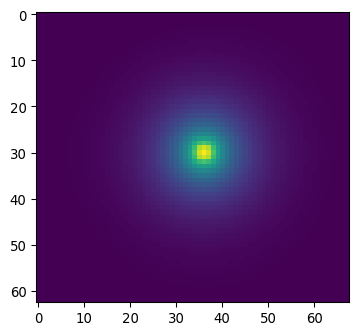

In [54]:

for y in range(ly):
    T3[y,:lx] = t0[y*lx:(y+1)*lx]

plt.imshow(T3)

In [17]:
ymed, xmed

(30, 36)

(62, 67)


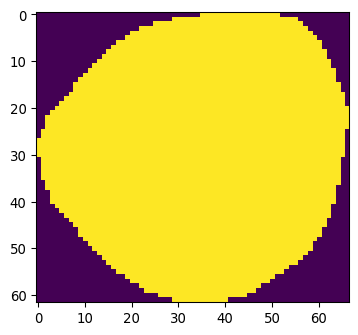

In [28]:
m = masks[sr, sc]
print(m.shape)
plt.imshow(m)

In [63]:
np.savetxt('mask.txt', m, delimiter=',')

In [15]:
np.set_printoptions(threshold=sys.maxsize)
x,y

(array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59, 60, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 